# Laptop Price Prediction

In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Data Import

In [2]:
# Load the dataset
df = pd.read_csv('./data/laptop_data.csv')
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# Data Analysis

In [3]:
# Null values data check
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [4]:
# Duplicate values data check
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows =", duplicate_rows)

Number of duplicate rows = 29


In [5]:
# Drop duplicate rows
print("Shape of the dataframe before dropping rows:", df.shape)
df.drop_duplicates(inplace=True)
print("Shape of the dataframe after dropping rows:", df.shape)

Shape of the dataframe before dropping rows: (1303, 11)
Shape of the dataframe after dropping rows: (1274, 11)


In [6]:
# Basic dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   object 
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   object 
 10  Price             1274 non-null   float64
dtypes: float64(2), object(9)
memory usage: 119.4+ KB


In [7]:
# Categorical & Numerical columns
catvars = df.select_dtypes(include=["object"]).columns
numvars = df.select_dtypes(include=["int32", "int64", "float32", "float64"]).columns

print("Categorical columns =", [c for c in catvars])
print("Numerical columns =", [n for n in numvars])

Categorical columns = ['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight']
Numerical columns = ['Inches', 'Price']


In [8]:
# Unique column values
def uniquevals(col):
    print(f'Unique values in col \'{col}\' are: {df[col].unique()}')
        
for col in df.columns:
    uniquevals(col)
    print("-"*125)

Unique values in col 'Company' are: ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
-----------------------------------------------------------------------------------------------------------------------------
Unique values in col 'TypeName' are: ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
-----------------------------------------------------------------------------------------------------------------------------
Unique values in col 'Inches' are: [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]
-----------------------------------------------------------------------------------------------------------------------------
Unique values in col 'ScreenResolution' are: ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full 

In [9]:
# Conversion of "RAM" and "Weight" columns to numerical datatype
df["Ram"] = df["Ram"].str.replace("GB", "").astype("int32")
df["Weight"] = df["Weight"].str.replace("kg", "").astype("float32")

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


# Exploratory Data Analysis

C:\Users\anike\AppData\Local\Temp\ipykernel_25988\1495477345.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price"], color="red")


<AxesSubplot: xlabel='Price', ylabel='Density'>

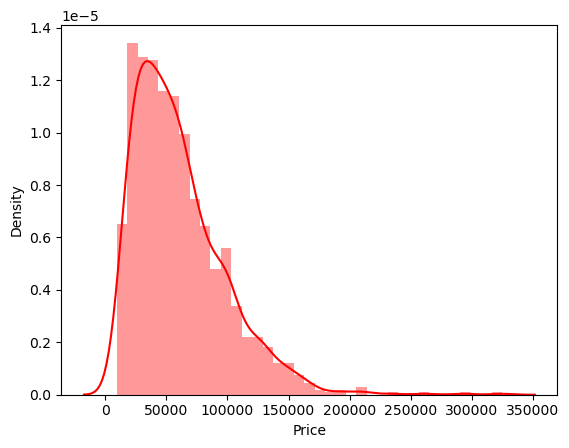

In [10]:
# Plot the Price distribution
sns.distplot(df["Price"], color="red")

**Findings:** *The "Price" attribute is a left-skewed gaussian curve.*

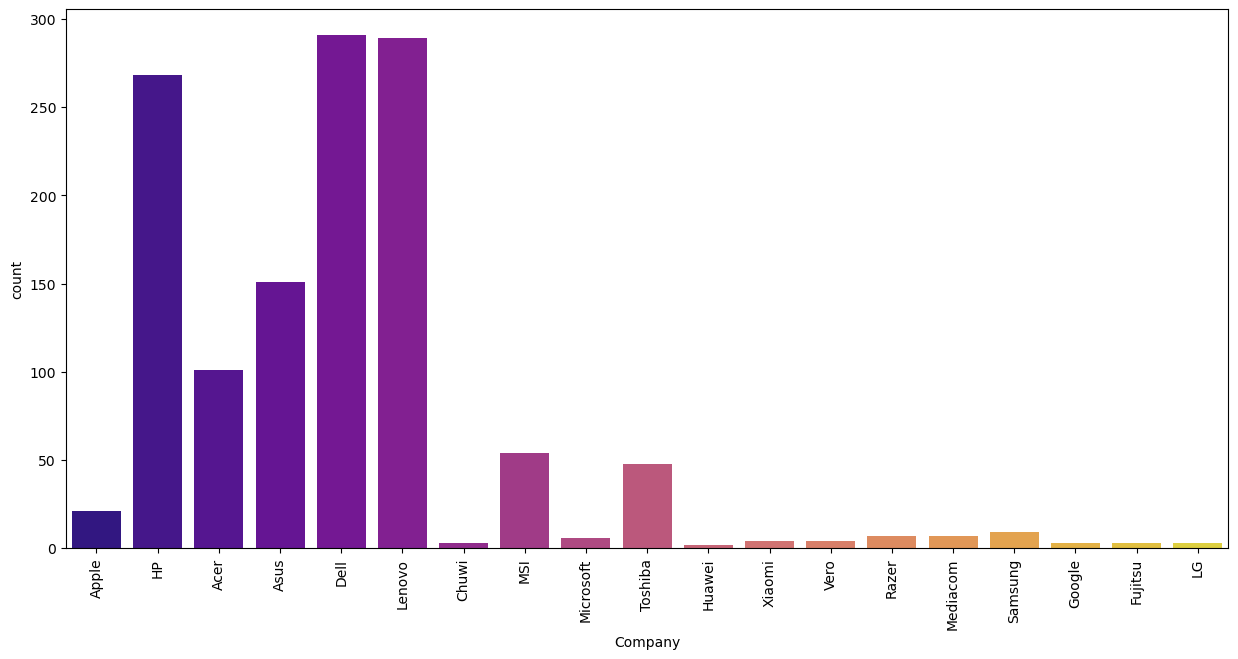

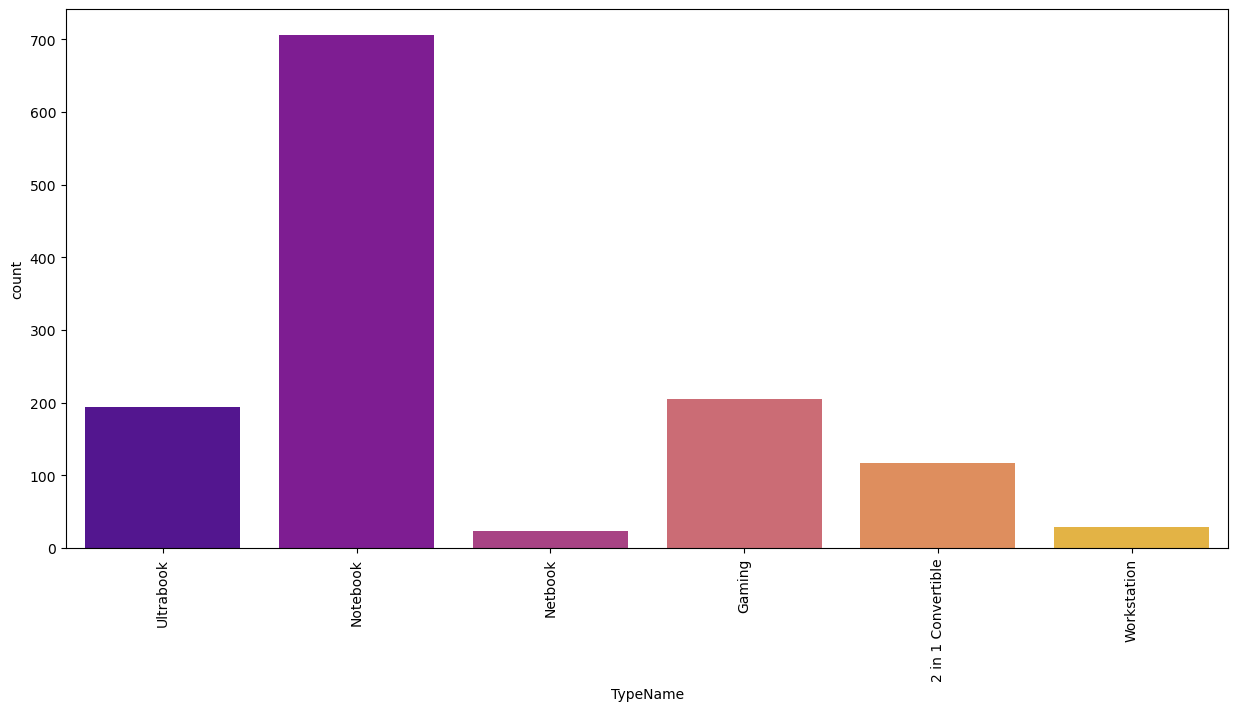

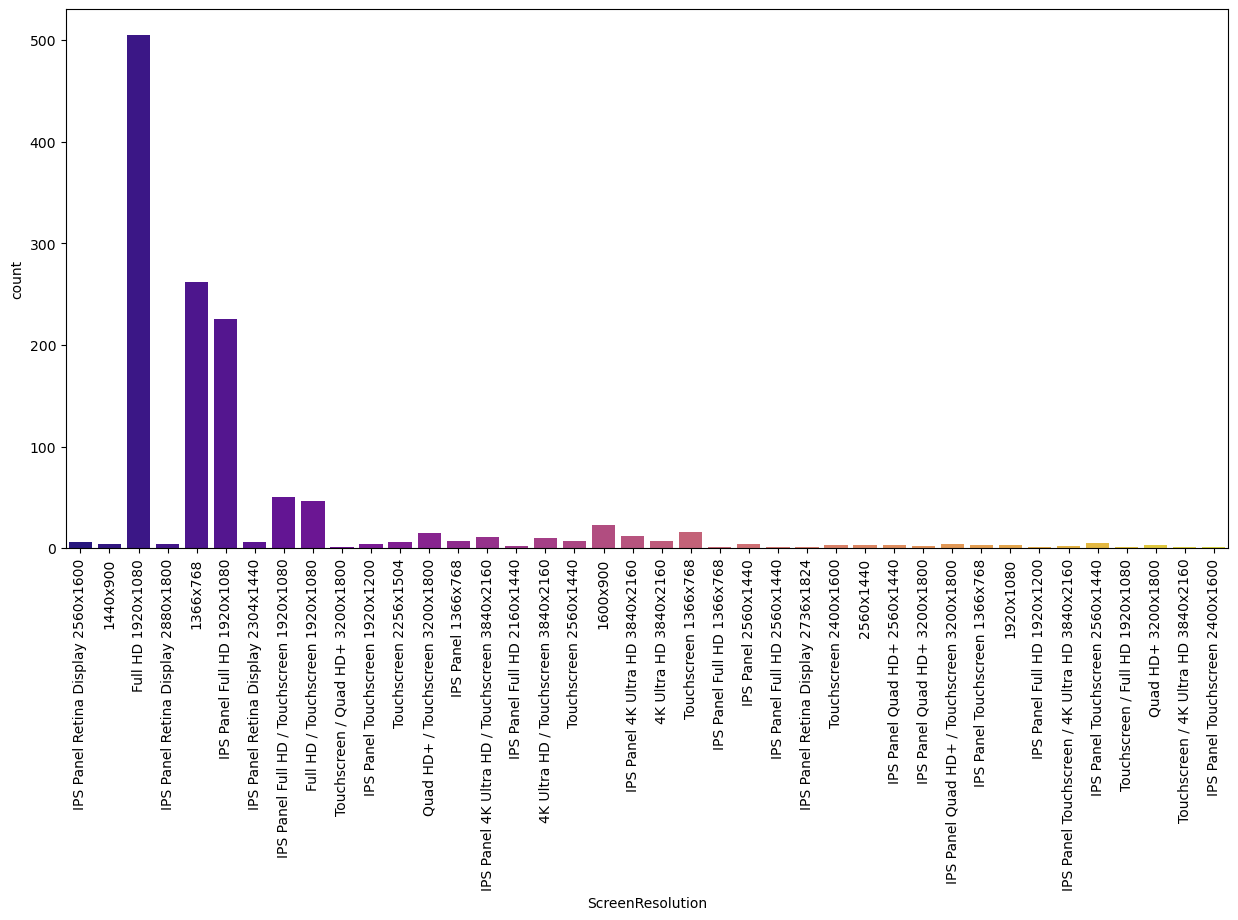

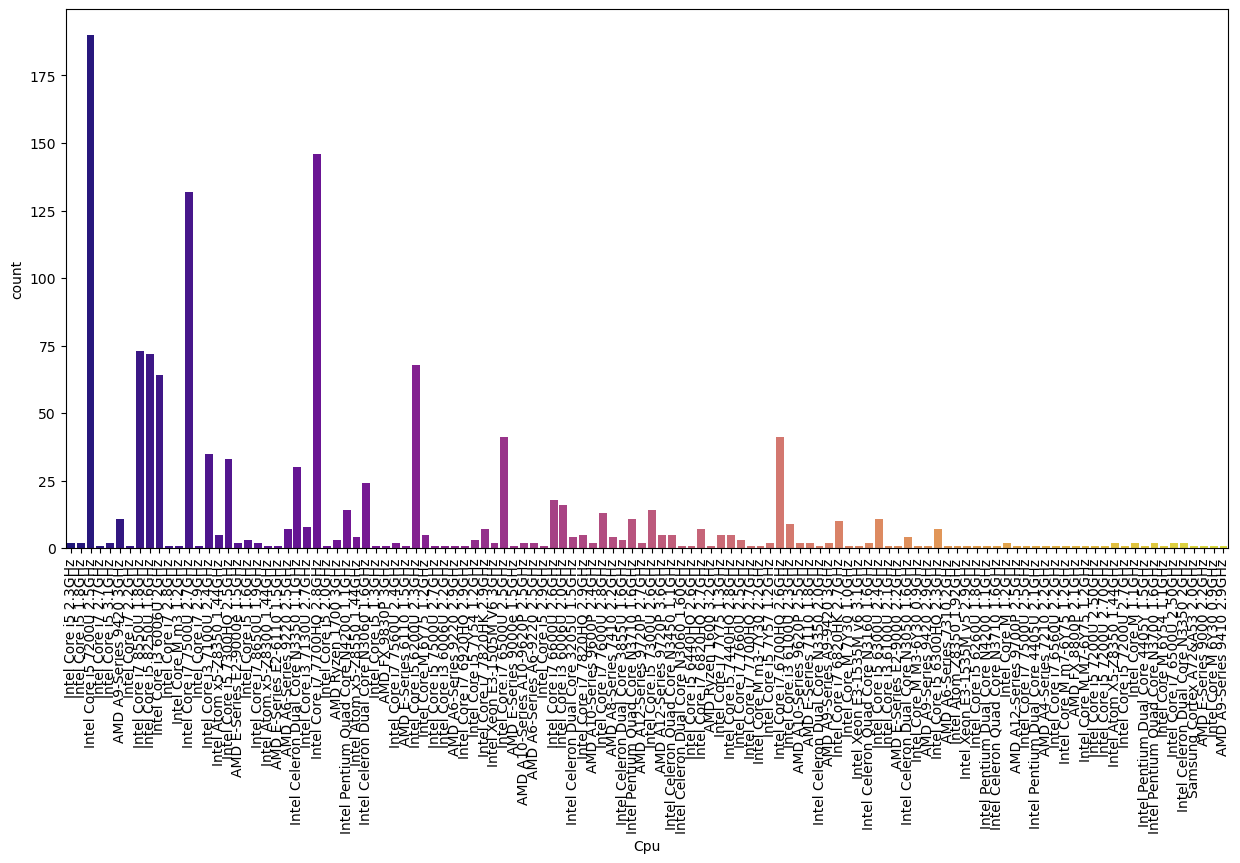

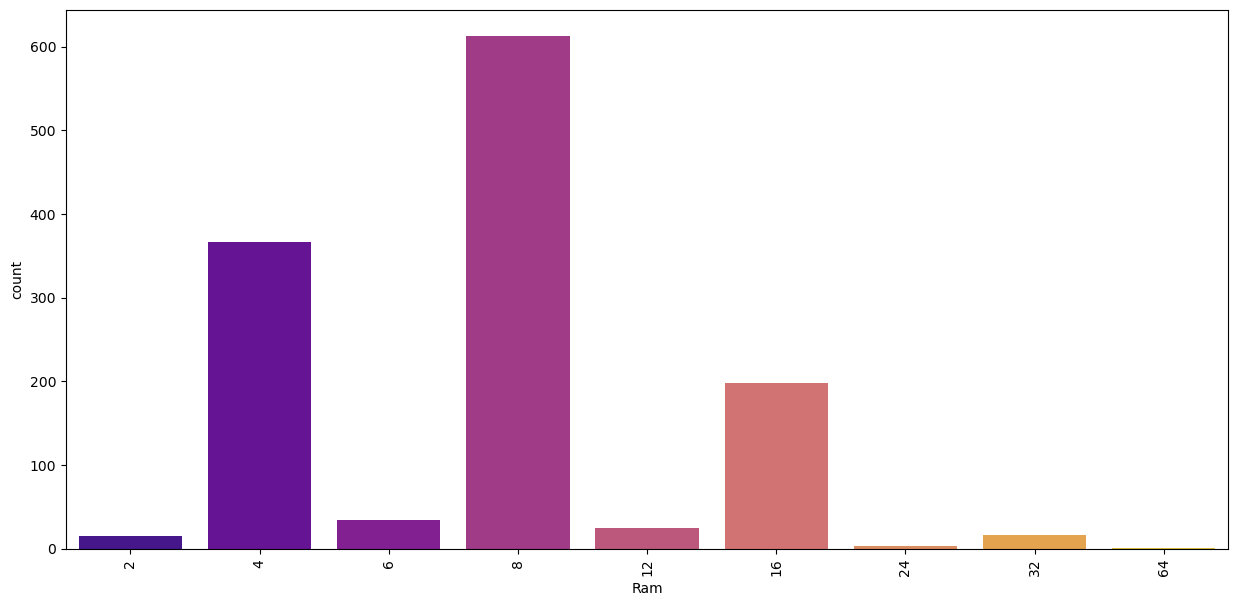

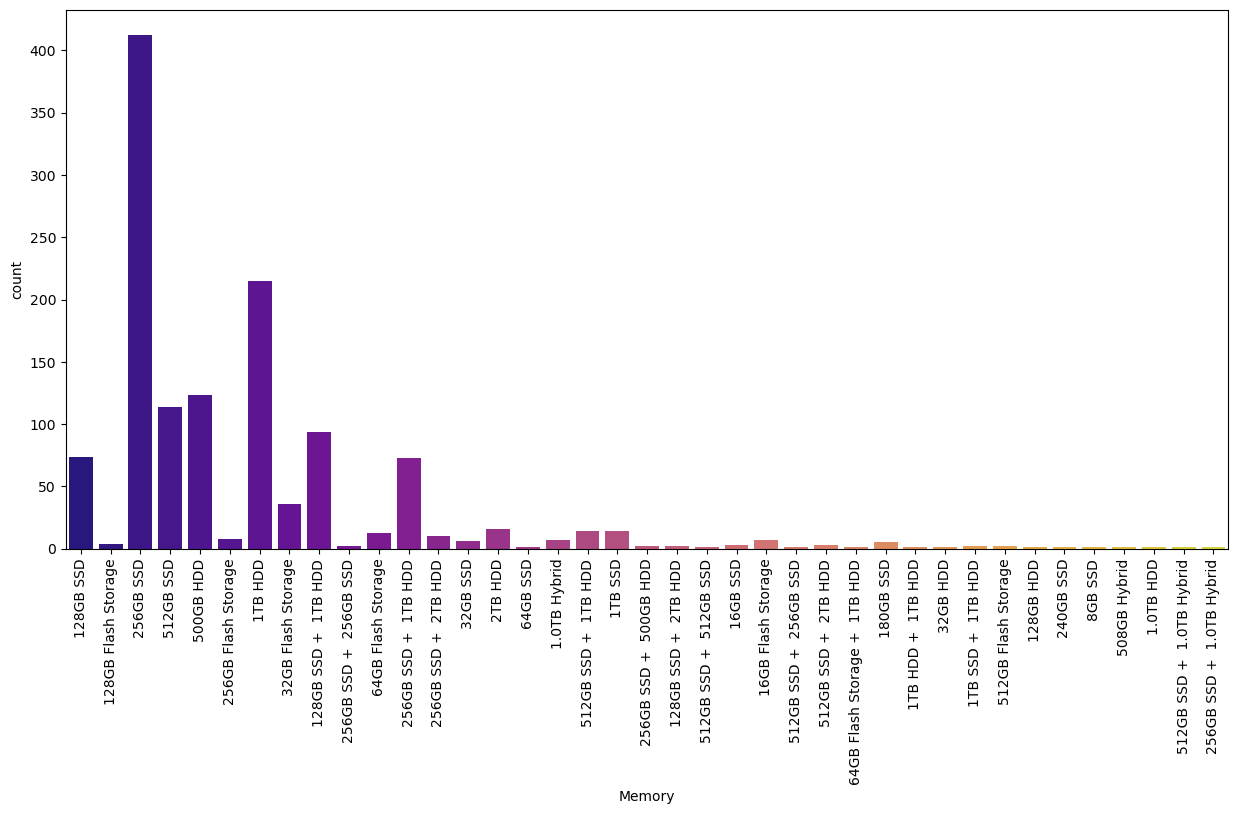

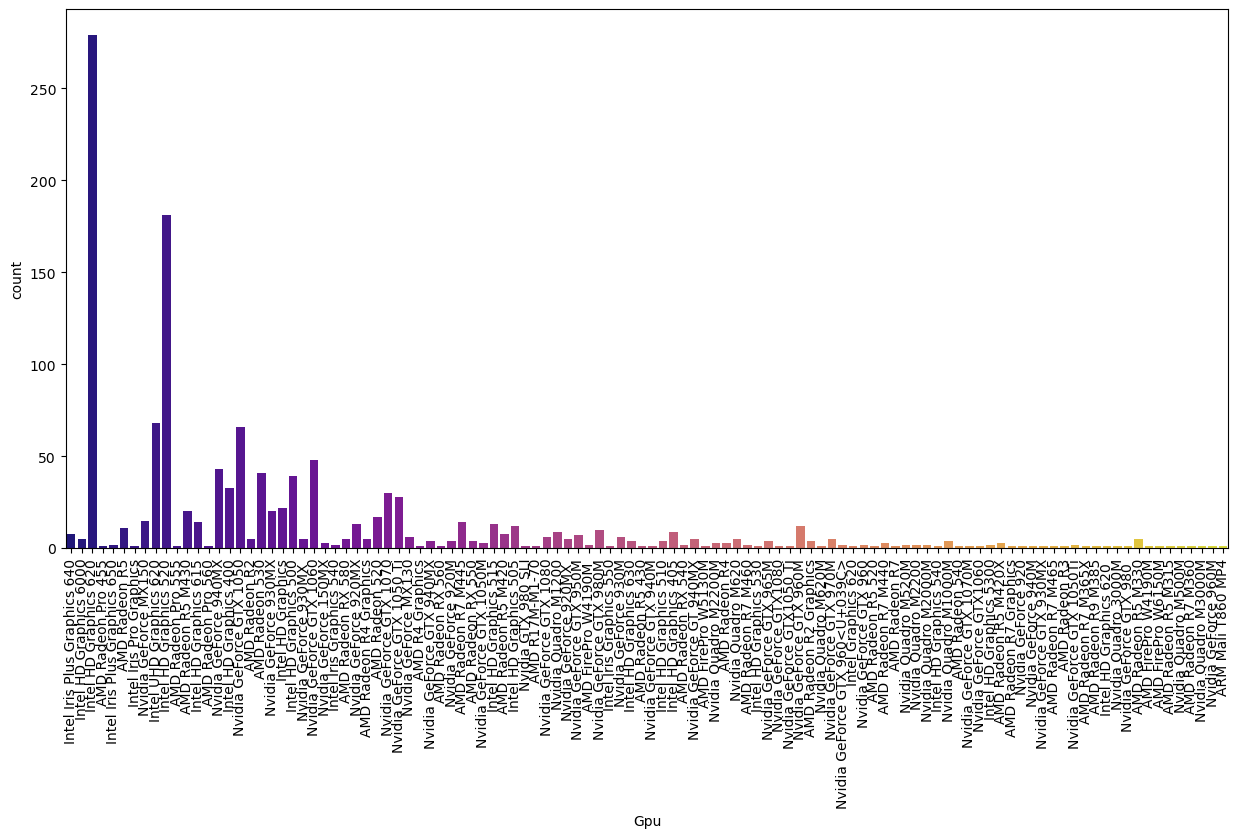

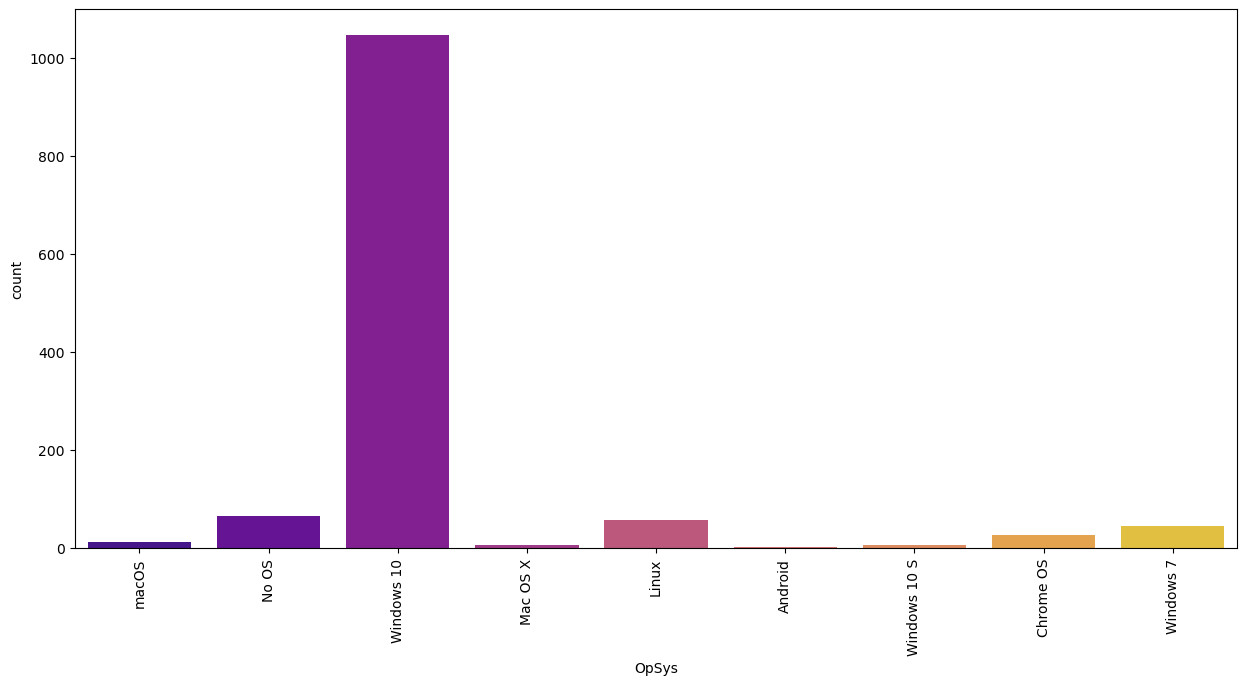

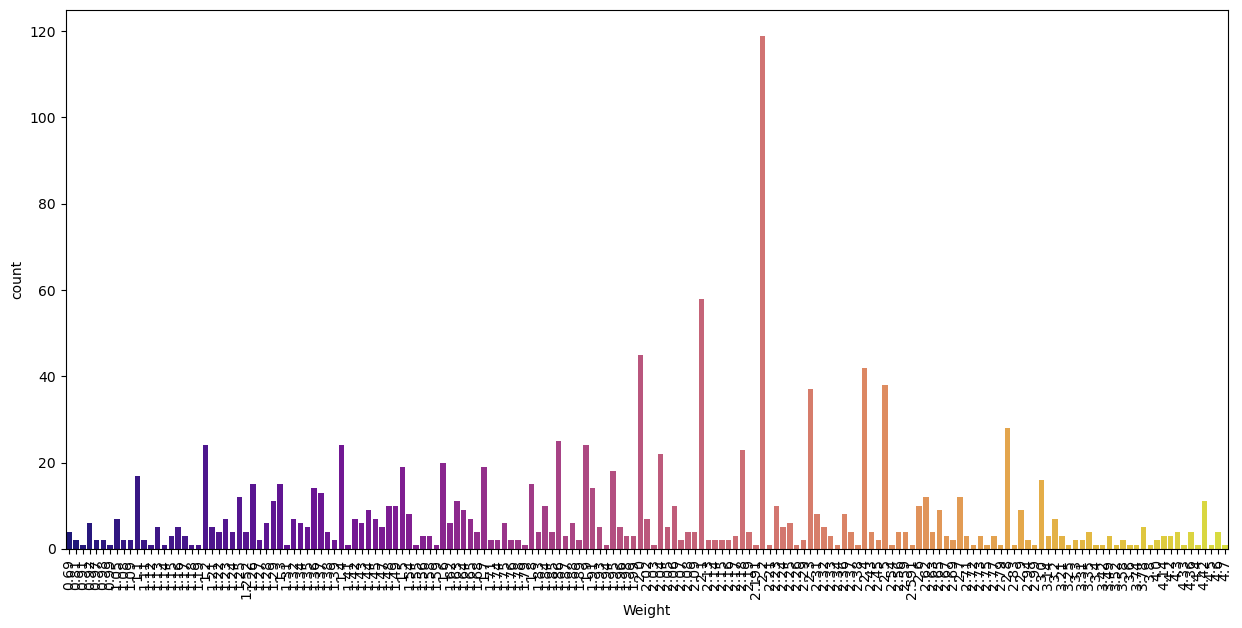

In [11]:
# Plotting the distribution for categorical variables
def drawplot(col):
    plt.figure(figsize=(15, 7))
    sns.countplot(df, x=col, palette="plasma")
    plt.xticks(rotation = "vertical")
    
for col in catvars:
    drawplot(col)

**Findings:**
    <ol>
        <li>*HP, Dell, and Lenovo are leading in laptop sales.*
        <li>*There's a strong demand for notebook laptops.*
        <li>*Full HD laptops with 1920x1080 resolution are top sellers.*
        <li>*Intel Core i5 and i7 processors are highly sought after.*
        <li>*Laptops with 4GB, 8GB, and 16GB RAM configurations are popular.*
        <li>*Both 256GB SSD and 1TB HDD storage options are in high demand.*
        <li>*Windows 10 operating systems are preferred by customers.*
    </ol>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

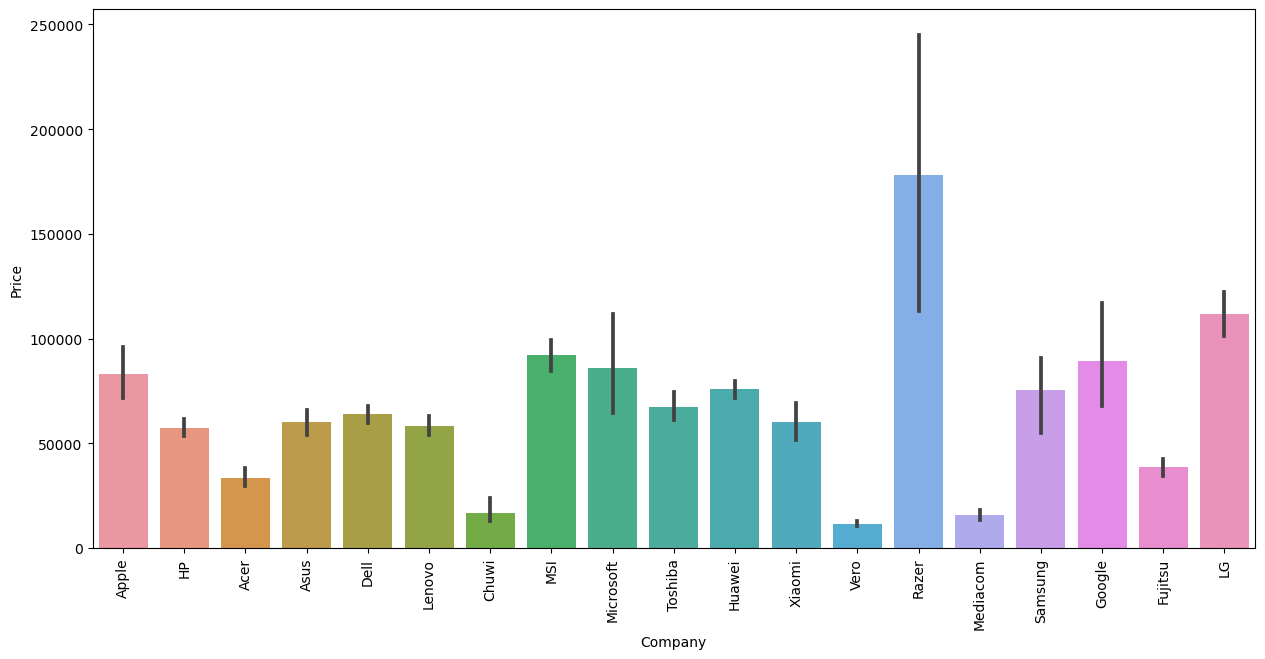

In [12]:
# Selling Price by Laptop brands
plt.figure(figsize=(15, 7))
sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation = 'vertical')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

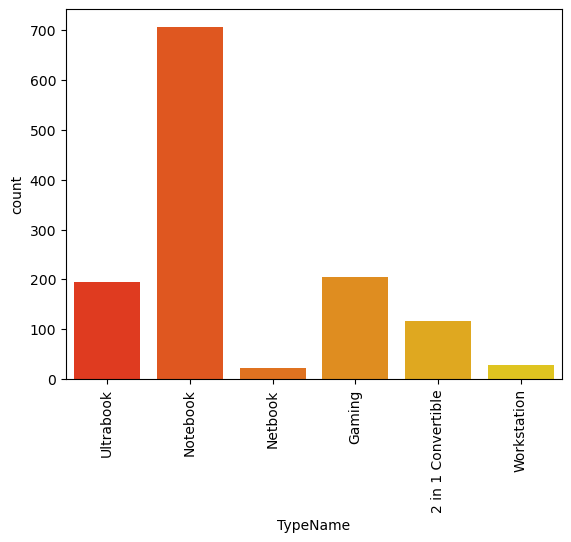

In [13]:
# Laptop types counter plot
sns.countplot(df, x="TypeName", palette="autumn")
plt.xticks(rotation = 'vertical')

**Findings:** *Notebooks are highly sought after.*

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

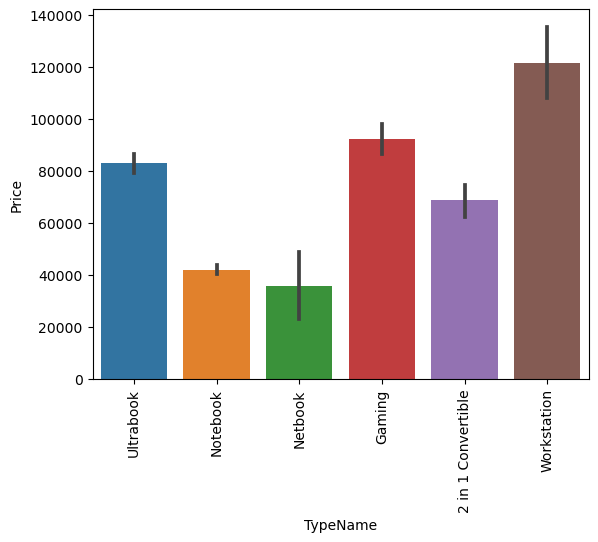

In [14]:
# Selling Price by laptop price
sns.barplot(x=df["TypeName"], y=df["Price"])
plt.xticks(rotation = 'vertical')

**Findings:** *The variation in notebook prices is low as the demand for it is high.*

<AxesSubplot: xlabel='Inches', ylabel='Price'>

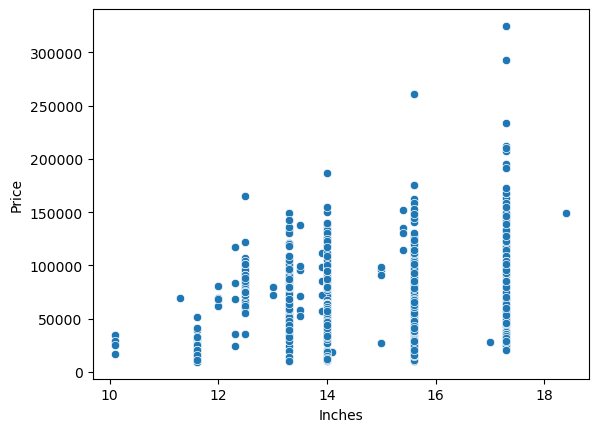

In [15]:
# Variation of inches towards the price
sns.scatterplot(x=df['Inches'], y=df['Price'])

<h1>Data preprocessing</h1>

<h3>Screen Resolution</h3>

*The `Screen Resolution` attribute has various screen resolution types such as `Touch Screen`, `Normal`, and `IPS Panel`.*

In [16]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscreen 3200x1800    

In [17]:
# creating a new touchscreen attribute
df['TouchScreen'] = df['ScreenResolution'].apply(lambda element:True if 'Touchscreen' in element else False)

df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
664,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.70,79215.1056,False
858,Dell,Notebook,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6200U 2.3GHz,8,1TB HDD,Intel HD Graphics 520,Windows 10,1.62,34578.7200,True
124,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,256GB SSD,AMD Radeon R5,Windows 10,2.10,24029.2800,False
921,HP,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,AMD Radeon R7 M365X,Windows 10,1.84,69103.6272,False
1129,HP,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 6300HQ 2.3GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.35,60153.1200,False


<AxesSubplot: xlabel='TouchScreen', ylabel='count'>

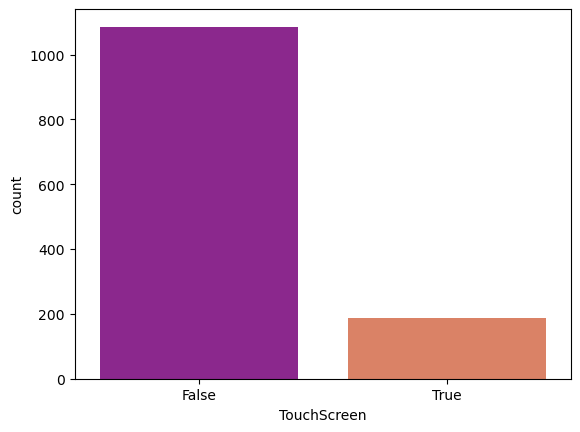

In [18]:
sns.countplot(df, x='TouchScreen', palette='plasma')

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

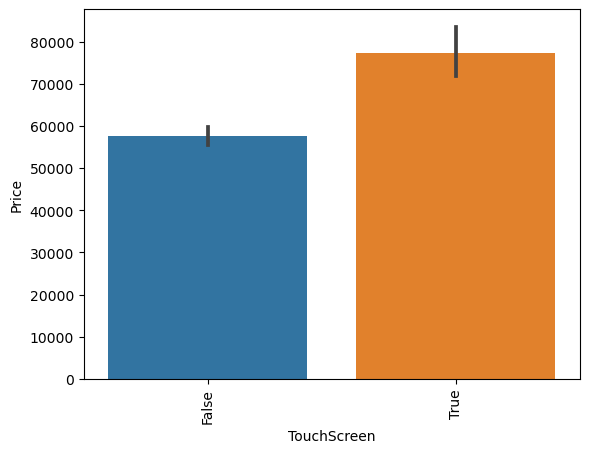

In [19]:
# touch screen on comparision with price of laptop
sns.barplot(x = df['TouchScreen'], y = df['Price'])
plt.xticks(rotation = 'vertical')

In [20]:
# creating a new col named IPS, does the laptop have IPS facility or not
df['IPS'] = df['ScreenResolution'].apply(
    lambda element:True if "IPS" in element else False
)

df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
1180,Lenovo,2 in 1 Convertible,14.0,IPS Panel Touchscreen 2560x1440,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.36,87219.3600,True,True
321,Lenovo,Notebook,17.3,1600x900,Intel Core i5 7200U 2.5GHz,4,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.79,31381.9200,False,False
919,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.20,59668.8048,False,False
1146,HP,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 6500U 2.50GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.26,122381.4960,False,False
1109,Asus,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.59,71341.9200,False,True


<AxesSubplot: xlabel='IPS', ylabel='count'>

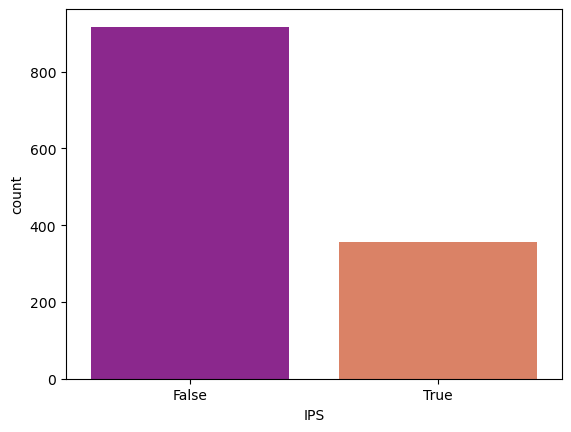

In [21]:
sns.countplot(df, x='IPS', palette='plasma')

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

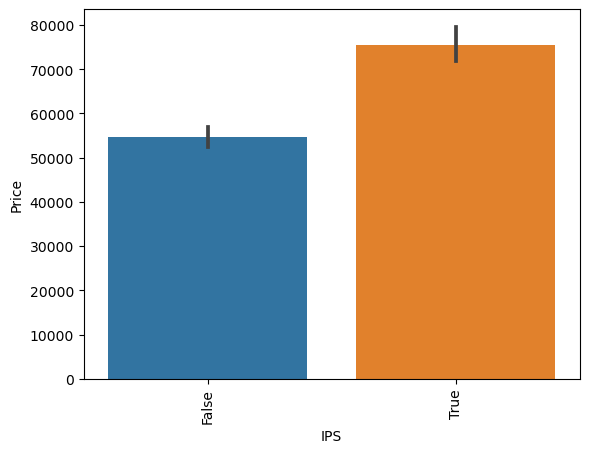

In [22]:
# price variation with respect to the IPS col
sns.barplot(x = df['IPS'], y = df['Price'])
plt.xticks(rotation = 'vertical')

<h3>Extracting the X and Y Resolution</h3>

In [23]:
# we will split the text at the letter "x" and seperate the 2 parts
# From this we can observe that one of the col is Y res we need to do some feature engineering on the X res col
splitdf = df['ScreenResolution'].str.split('x',n = 1,expand=True)

splitdf.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [24]:
splitdf = df['ScreenResolution'].str.split('x', n = 1, expand=True)
df['X_res'] = splitdf[0]
df['Y_res'] = splitdf[1]

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,False,True,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,False,False,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,False,False,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,False,True,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,False,True,IPS Panel Retina Display 2560,1600


In [25]:
'''
So basically from that whole text of the X_res and Y_res col, we need to 
extract the digits from it, but the problem is the numbers are scattered 
in some cases, that is the reason why we will use regex. If we use this,
we will get the exact numbers that we are looking for!
So firstly replace all the "," with "" and then find all numbers
from that string as "\d+\.?\d+", \d means that integer number and \.? 
all the numbers which come after a number and \d+ the string must end with number

'''
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df['Y_res'] = df['Y_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,False,True,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,False,False,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,False,False,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,False,True,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,False,True,2560,1600


In [26]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price             1274 non-null   float64
 11  TouchScreen       1274 non-null   bool   
 12  IPS               1274 non-null   bool   
 13  X_res             1274 non-null   int32  
 14  Y_res             1274 non-null   int32  
dtypes: bool(2), float32(1), float64(2), int32(3), object(7)
memory usage: 121.9+ KB


<AxesSubplot: >

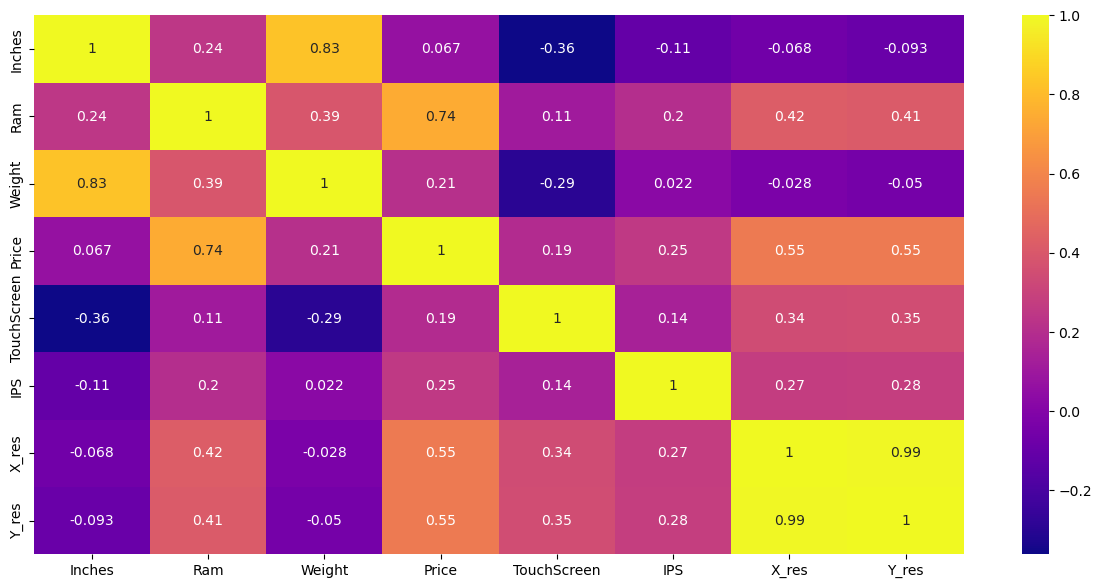

In [27]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='plasma')

In [28]:
df.corr()['Price']

Inches         0.066990
Ram            0.740106
Weight         0.212192
Price          1.000000
TouchScreen    0.188631
IPS            0.250358
X_res          0.552074
Y_res          0.548111
Name: Price, dtype: float64

*The correlation plot indicates that as the X_res and Y_res values increase, the laptop price also rises. This suggests a positive correlation between X_res and Y_res, indicating that they provide valuable information. Therefore, I divided the `Resolution` column into separate `X_res` and `Y_res` columns.*

*To improve matters, we could introduce a new column called `PPI (pixels per inch)`. Since the correlation plot showed high collinearity between `X_res` and `Y_res`, we propose merging them with `Inches`, which exhibits less collinearity. Here's the formula for calculating `PPI`.*

$$
    PPI(pixels per inch) = \frac{\sqrt{X\_resolution^2+Y\_resolution^2}}{inches}
$$

In [29]:
df['PPI'] = (((df['X_res']**2+df['Y_res']**2))**0.5/df['Inches']).astype('float')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,False,True,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,False,False,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,False,False,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,False,True,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,False,True,2560,1600,226.983005


In [30]:
df.corr()['Price']

Inches         0.066990
Ram            0.740106
Weight         0.212192
Price          1.000000
TouchScreen    0.188631
IPS            0.250358
X_res          0.552074
Y_res          0.548111
PPI            0.469539
Name: Price, dtype: float64

*Upon examining the correlation data, we notice that `PPI` demonstrates a strong correlation. Therefore, we will utilize it since it combines information from three features, offering a comprehensive overview of the three columns. Consequently, we also discard `Inches`, `X_res`, and `Y_res`.*

In [31]:
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,False,True,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,False,False,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,False,False,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,False,True,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,False,True,226.983005


### CPU Attribute

*Next, our focus shifts to the `CPU` column, which contains extensive text data. Efficient processing is crucial here as valuable insights could emerge from this data.*

In [32]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 2.9GHz             1
AMD A6-Series 7310 2GHz          1
AMD A9-Series 9410 2.9GHz        1
Name: Cpu, Length: 118, dtype: int64

*The majority of processors come from Intel, so we'll group them into various categories such as i5, i7, and others. The "others" category encompasses Intel processors without an i3, i5, or i7 designation—they're distinct from those categories. Additionally, there's a separate category for AMD processors, which is entirely different. Therefore, we'll extract the first three words from the CPU column to determine the CPU type for each row.*

In [33]:
df['CPU_name'] = df['Cpu'].apply(lambda text:" ".join(text.split()[:3]))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,False,True,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,False,False,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,False,False,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,False,True,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,False,True,226.983005,Intel Core i5


In [34]:
'''
As mentioned earlier,if we get any of the intel `i3,i5 or i7` versions
we will return them as it is,but if we get any other processor
we will first check whether is that a variant of the intel? or not
if yes,then we will tag it as "Other Intel Processor" else we will
say it as `AMD Processor`

'''
def processortype(text):
    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text
    elif text.split()[0]=='Intel':
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'    
    
df['CPU_name'] = df['CPU_name'].apply(lambda text:processortype(text))

df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,False,True,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,False,False,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,False,False,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,False,True,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,False,True,226.983005,Intel Core i5


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processor')])

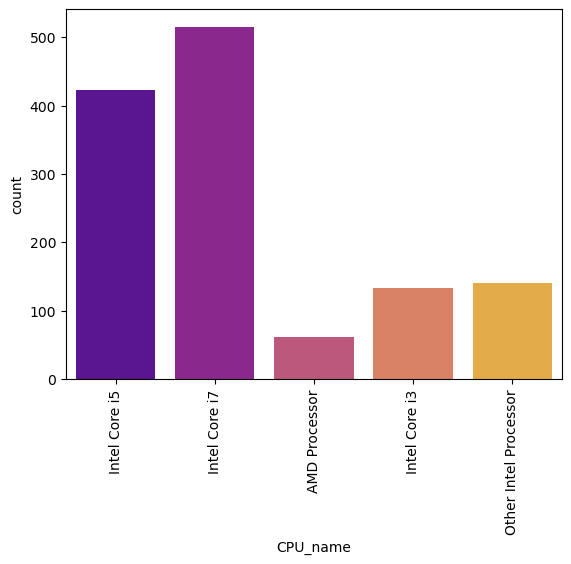

In [35]:
sns.countplot(df, x='CPU_name', palette='plasma')
plt.xticks(rotation = 'vertical')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processor')])

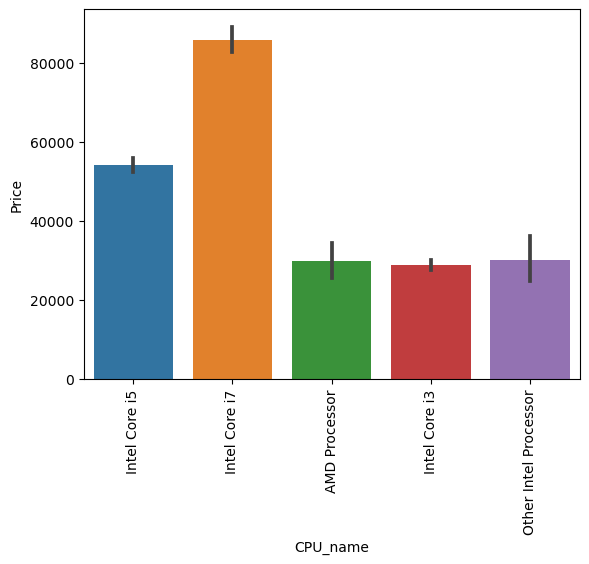

In [36]:
# price vs processor variation
sns.barplot(df, x='CPU_name', y='Price')
plt.xticks(rotation = 'vertical')

In [37]:
## dropping the cpu column
df.drop(columns=['Cpu'], inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,False,True,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,False,False,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,False,False,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,False,True,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,False,True,226.983005,Intel Core i5


### RAM Column

<AxesSubplot: xlabel='Ram', ylabel='count'>

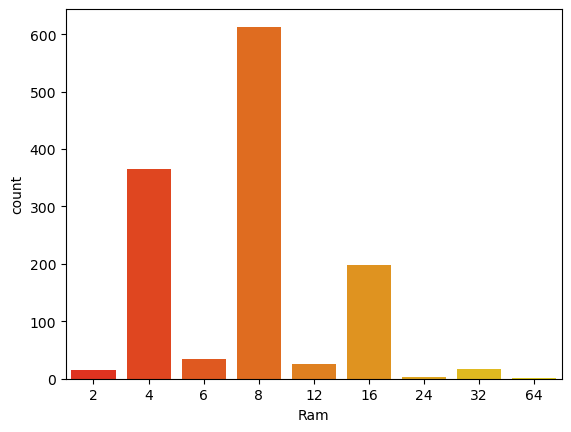

In [38]:
sns.countplot(df, x='Ram', palette='autumn')

<AxesSubplot: xlabel='Ram', ylabel='Price'>

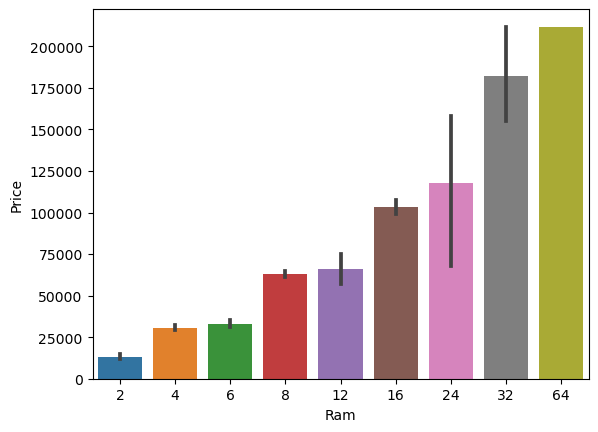

In [39]:
## ram is having good relation with price

sns.barplot(df, x='Ram', y='Price')

### Memory Column

*We'll split the memory type and its corresponding value, following a similar approach to what was done earlier. However, this section requires step-by-step actions. Here, the memory isn't presented as a whole; rather, it's in different dimensions like `128GB SSD + 1TB HDD.` To unify it into a consistent format, we need to make some adjustments, which are outlined below.*

In [40]:
df['Memory'].iloc[:1][0]

'128GB SSD'

In [41]:
# we have different categories and also different kinds of variations 
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [42]:
## 4 most common variants observed : HHD, SSD, Flash Storage, Hybrid

# this expression will remove the decimal space for example 1.0 TB will be 1TB

df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex = True)

# replace the GB word with " "

df['Memory'] = df['Memory'].str.replace('GB','')

# replace the TB word with "000"

df['Memory'] = df['Memory'].str.replace('TB','000')

# split the word accross the "+" character

newdf = df['Memory'].str.split("+",n = 1,expand = True)

newdf

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1269,500 HDD,None
1270,128 SSD,None
1271,512 SSD,None
1272,64 Flash Storage,None


In [43]:
# we will strip up all the white spaces,basically eliminating white space

df['first'] = newdf[0]
df['first'] = df['first'].str.strip()
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,False,True,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,False,False,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,False,False,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,False,True,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,False,True,226.983005,Intel Core i5,256 SSD


In [44]:
def applychanges(value):
    
    df['Layer1'+value] = df['first'].apply(lambda x:1 if value in x else 0)
    
    
listtoapply = ['HDD','SSD','Hybrid','FlashStorage']    
for value in listtoapply:
    applychanges(value)
    
    
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,False,True,226.983005,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,False,False,127.677940,Intel Core i5,128 Flash Storage,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,False,False,141.211998,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,False,True,220.534624,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,False,True,226.983005,Intel Core i5,256 SSD,0,1,0,0


In [45]:
# remove all the characters just keep the numbers

df['first'] = df['first'].str.replace(r'\D','')
df['first'].value_counts()

C:\Users\anike\AppData\Local\Temp\ipykernel_25988\1491245391.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D','')


256     508
1000    240
128     175
512     136
500     123
32       43
2000     16
64       15
16       10
180       5
240       1
8         1
508       1
Name: first, dtype: int64

In [46]:
df['Second'] = newdf[1]
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,False,True,226.983005,Intel Core i5,128,0,1,0,0,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,False,False,127.677940,Intel Core i5,128,0,0,0,0,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,False,False,141.211998,Intel Core i5,256,0,1,0,0,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,False,True,220.534624,Intel Core i7,512,0,1,0,0,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,False,True,226.983005,Intel Core i5,256,0,1,0,0,None


In [47]:
def applychanges1(value):
    df['Layer2'+value] = df['Second'].apply(lambda x:1 if value in x else 0)
    
    
listtoapply1 = ['HDD','SSD','Hybrid','FlashStorage']
df['Second'] = df['Second'].fillna("0")
for value in listtoapply1:
    applychanges1(value)
    
# remove all the characters just keep the numbers
df['Second'] = df['Second'].str.replace(r'\D','')
df['Second'].value_counts()

C:\Users\anike\AppData\Local\Temp\ipykernel_25988\3385503899.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Second'] = df['Second'].str.replace(r'\D','')


0       1066
1000     187
2000      15
256        3
500        2
512        1
Name: Second, dtype: int64

In [48]:
df['first'] = df['first'].astype('int')
df['Second'] = df['Second'].astype('int')
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,False,True,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,False,False,...,128,0,0,0,0,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,False,False,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,False,True,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,False,True,...,256,0,1,0,0,0,0,0,0,0


In [49]:
# multiplying the elements and storing the result in subsequent columns
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["Second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["Second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["Second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1FlashStorage"]+df["Second"]*df["Layer2FlashStorage"])


## dropping of uncessary columns

df.drop(columns=['first', 'Second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1FlashStorage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2FlashStorage', 'Memory'], inplace=True)

In [50]:
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Hybrid,Flash_Storage
944,Lenovo,2 in 1 Convertible,8,Intel HD Graphics 515,Windows 10,1.10,69210.72,True,True,194.947537,Other Intel Processor,0,256,0,0
97,Dell,Notebook,4,AMD Radeon R5 M430,Linux,2.20,25840.80,False,False,141.211998,Intel Core i3,0,256,0,0
719,HP,Notebook,8,Nvidia GeForce 930MX,Windows 10,2.63,63936.00,False,False,127.335675,Intel Core i7,0,256,0,0
113,HP,Notebook,4,Intel UHD Graphics 620,Windows 10,1.63,38468.16,False,True,111.935204,Intel Core i5,500,0,0,0
71,Dell,Ultrabook,8,AMD Radeon 530,Windows 10,1.40,50882.40,False,True,165.632118,Intel Core i7,0,256,0,0


In [51]:
df.corr()['Price']

Ram              0.740106
Weight           0.212192
Price            1.000000
TouchScreen      0.188631
IPS              0.250358
PPI              0.469539
HDD             -0.098011
SSD              0.669957
Hybrid           0.022533
Flash_Storage         NaN
Name: Price, dtype: float64

*From our correlation analysis, it's evident that `Hybrid` and `Flash Storage` have minimal impact. Therefore, we can exclude them. Meanwhile, `HDD` and `SSD` show a significant correlation. Specifically, HDD correlates negatively with price, which aligns with reality. As laptop prices rise, there's a higher likelihood of them featuring SSD instead of HDD, and vice versa.*

In [52]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Gpu', 'OpSys', 'Weight', 'Price',
       'TouchScreen', 'IPS', 'PPI', 'CPU_name', 'HDD', 'SSD', 'Hybrid',
       'Flash_Storage'],
      dtype='object')

In [53]:
df.drop(columns = ['Hybrid','Flash_Storage'],inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,False,True,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,False,False,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,False,False,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,False,True,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,False,True,226.983005,Intel Core i5,0,256


### GPU Column

In [54]:
df['Gpu'].value_counts()

Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

*Given the limited laptop data available, it's advisable to concentrate on GPU brands rather than the specific values associated with them. Our focus will primarily be on identifying and analyzing the different GPU brands.*

In [55]:
# this is what we will be doing,extracting the brands 
a = df['Gpu'].iloc[1]
print(a.split()[0])

Intel


<AxesSubplot: xlabel='Gpu brand', ylabel='count'>

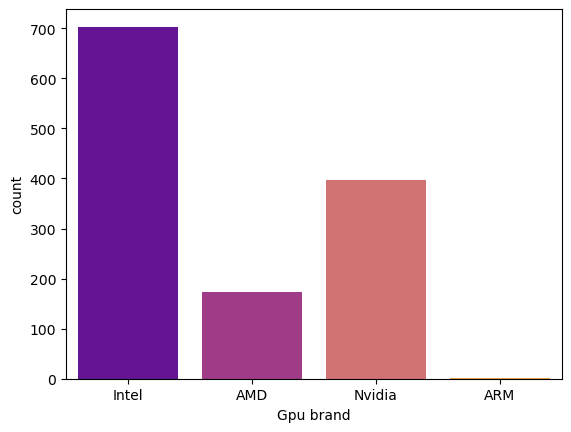

In [56]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])
sns.countplot(df, x='Gpu brand', palette='plasma')

<AxesSubplot: xlabel='Gpu brand', ylabel='count'>

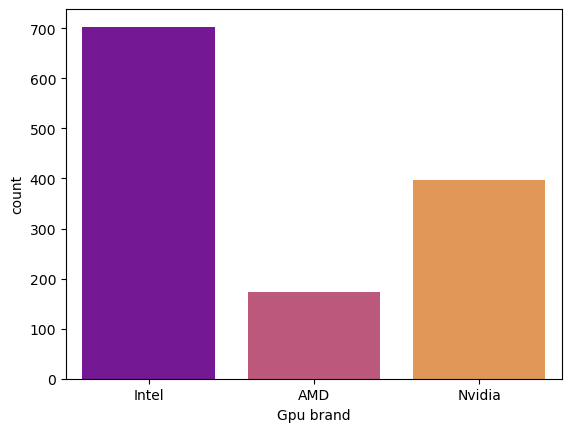

In [57]:
# removing the "ARM" tuple
df = df[df['Gpu brand']!='ARM']
sns.countplot(df, x='Gpu brand', palette='plasma')

<AxesSubplot: xlabel='Gpu brand', ylabel='Price'>

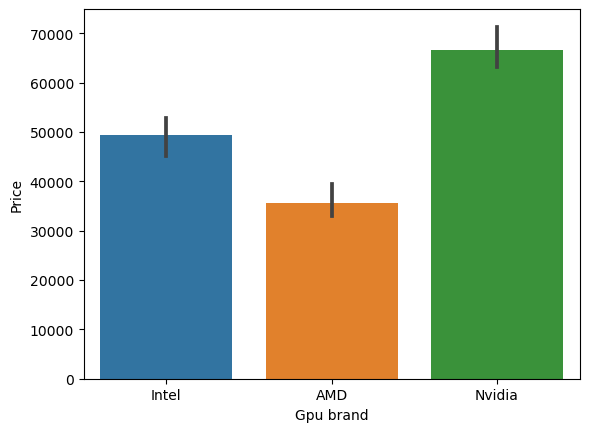

In [58]:
# price-GPU analysis,i used np.median inorder to check if there is any
# inpact of outlier or not

sns.barplot(df, x='Gpu brand', y='Price', estimator=np.median)

In [59]:
df = df.drop(columns=['Gpu'])
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,False,True,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,False,False,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,False,False,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,False,True,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,False,True,226.983005,Intel Core i5,0,256,Intel


### Operating System Column

In [60]:
df['OpSys'].value_counts()

Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

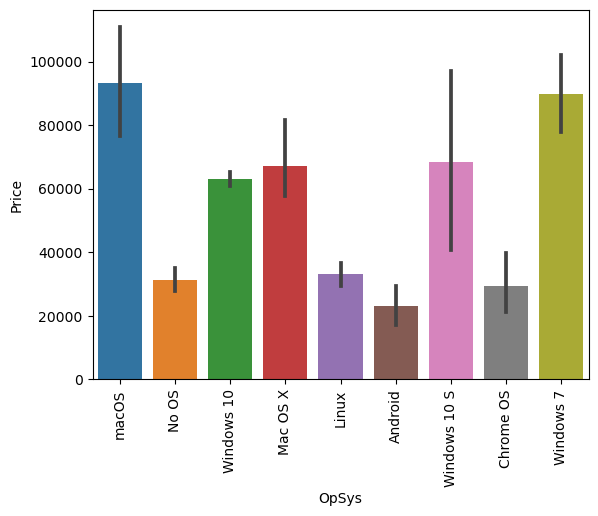

In [61]:
sns.barplot(df, x='OpSys', y='Price')
plt.xticks(rotation = 'vertical')
plt.show()

In [62]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [63]:
# club {Windows 10,Windows 7,Windows 7 S}-->Windows
# club {macOS,mac OS X}--> mac
# else return Others

def setcategory(text):
    
    if text=='Windows 10' or text=='Windows 7' or text=='Windows 10 S':
        return 'Windows'
    
    elif text=='Mac OS X' or text=='macOS':
        return 'Mac'
    
    else:
        return 'Other'
    
    
df['OpSys'] = df['OpSys'].apply(lambda x:setcategory(x))

df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,False,True,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,False,False,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,30636.0000,False,False,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,False,True,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,False,True,226.983005,Intel Core i5,0,256,Intel


In [64]:
df.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
261,Lenovo,Notebook,4,Other,2.20,23656.32,False,False,141.211998,Intel Core i3,0,256,Intel
331,Toshiba,Notebook,8,Windows,2.00,50243.04,False,True,141.211998,Intel Core i5,0,256,Intel
1197,Asus,Gaming,16,Windows,4.30,114552.00,False,True,127.335675,Intel Core i7,1000,512,Nvidia
1071,HP,Notebook,4,Windows,2.31,63882.72,False,False,100.454670,Intel Core i5,500,0,Intel
72,Dell,Notebook,8,Windows,2.20,46353.60,False,False,141.211998,Intel Core i7,0,256,AMD


<AxesSubplot: xlabel='OpSys', ylabel='count'>

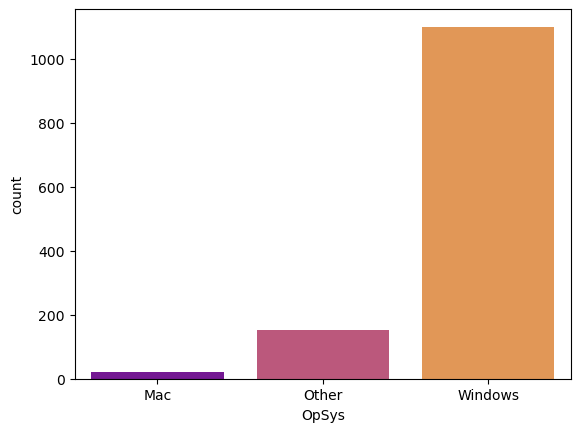

In [65]:
sns.countplot(df, x='OpSys', palette='plasma')

(array([0, 1, 2]),
 [Text(0, 0, 'Mac'), Text(1, 0, 'Other'), Text(2, 0, 'Windows')])

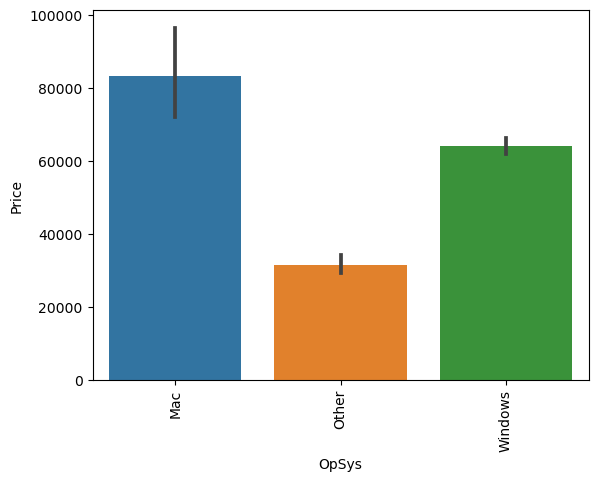

In [66]:
sns.barplot(df, x='OpSys', y='Price')
plt.xticks(rotation = 'vertical')

### Weight column 

C:\Users\anike\AppData\Local\Temp\ipykernel_25988\1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<AxesSubplot: xlabel='Weight', ylabel='Density'>

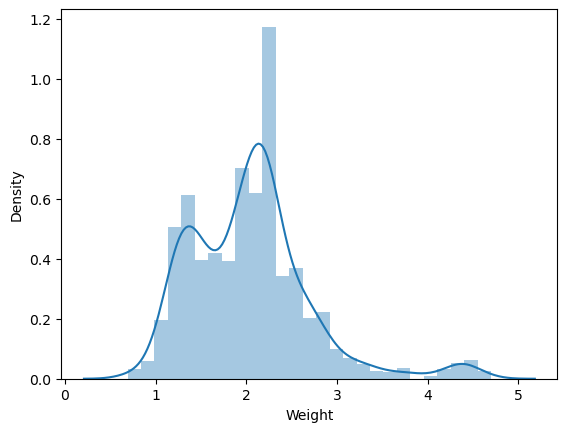

In [67]:
sns.distplot(df['Weight'])

<AxesSubplot: xlabel='Weight', ylabel='Price'>

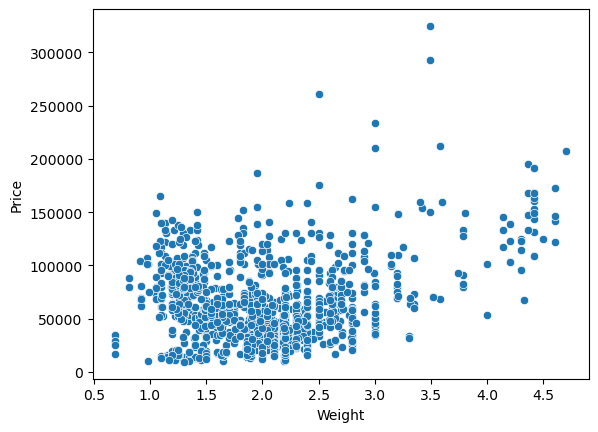

In [68]:
sns.scatterplot(df, x='Weight', y='Price')

### Price Column

C:\Users\anike\AppData\Local\Temp\ipykernel_25988\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<AxesSubplot: xlabel='Price', ylabel='Density'>

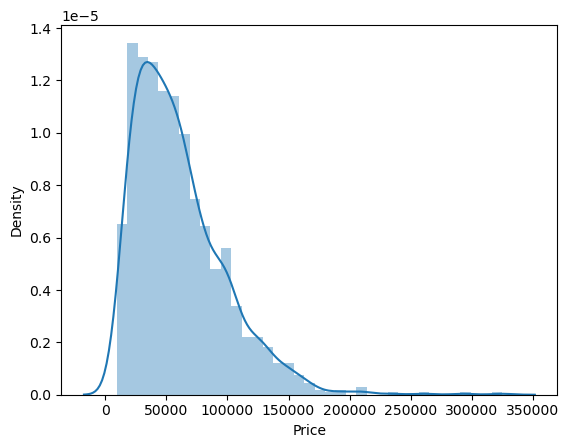

In [69]:
sns.distplot(df['Price'])

C:\Users\anike\AppData\Local\Temp\ipykernel_25988\3635272803.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<AxesSubplot: xlabel='Price', ylabel='Density'>

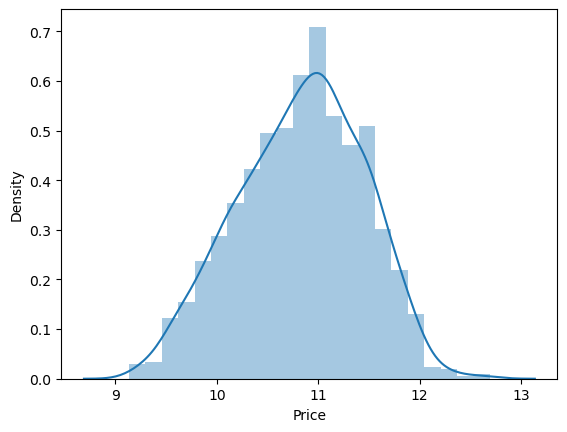

In [70]:
# so if we apply np.log to the Price col we get a gaussian distibution

sns.distplot(np.log(df['Price']))

In [71]:
## correlation with price

df.corr()['Price']

Ram            0.739996
Weight         0.211667
Price          1.000000
TouchScreen    0.190382
IPS            0.251514
PPI            0.471481
HDD           -0.098481
SSD            0.669808
Name: Price, dtype: float64

<AxesSubplot: >

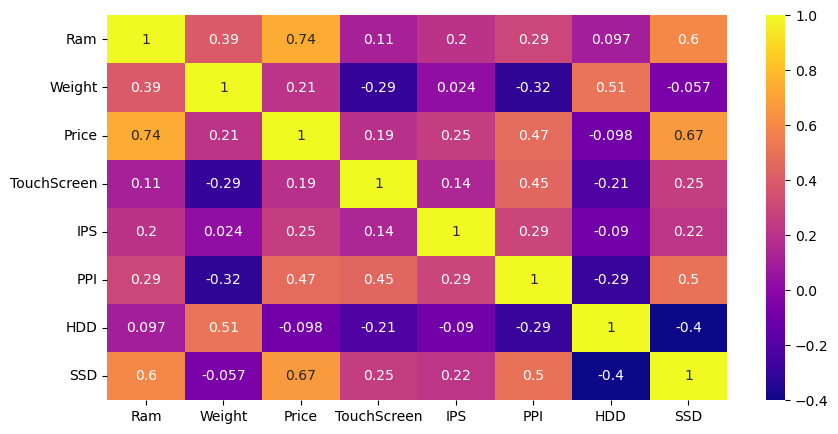

In [72]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='plasma')

## Model Building

In [73]:
test = np.log(df['Price'])
train = df.drop(['Price'],axis = 1)


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [75]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.15, random_state=2)

X_train.shape, X_test.shape

((1082, 12), (191, 12))

*We often utilize a class called ColumnTransformer, which we import, extensively in constructing models through Pipelines. To utilize this effectively, we need to obtain the index numbers of the columns containing categorical variables.*

In [76]:
mapper = {i:value for i,value in enumerate(X_train.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'TouchScreen',
 6: 'IPS',
 7: 'PPI',
 8: 'CPU_name',
 9: 'HDD',
 10: 'SSD',
 11: 'Gpu brand'}

### Linear Regression

In [77]:
# we will apply one hot encoding on the columns with this indices-->[0,1,3,8,11]
# the remainder we keep as passthrough i.e no other col must get effected 
# except the ones undergoing the transformation!

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.7831567115449394
MAE 0.2216769649105866


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [78]:
## now mae is 0.21 so if you want to check how much difference is there do this

## we see there is a difference of 1.23 only as per the orignal value
## that is our model predicts +-0.21 more/less than the original price!

np.exp(0.21)

1.2336780599567432

### Ridge Regression

In [79]:
# we will apply one hot encoding on the columns with this indices-->[0,1,3,8,11]
# the remainder we keep as passthrough i.e no other col must get effected 
# except the ones undergoing the transformation!

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.795403435973673
MAE 0.21818884825637247


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### LassoRegression

In [80]:
# we will apply one hot encoding on the columns with this indices-->[0,1,3,8,11]
# the remainder we keep as passthrough i.e no other col must get effected 
# except the ones undergoing the transformation!

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.7930851842744954
MAE 0.21874256893808874


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Decision Tree

In [81]:
# we will apply one hot encoding on the columns with this indices-->[0,1,3,8,11]
# the remainder we keep as passthrough i.e no other col must get effected 
# except the ones undergoing the transformation!

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8060258691539387
MAE 0.20645196166108395


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Random Forest

In [82]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8554034002634634
MAE 0.1779991811367265


In [83]:
import pickle

pickle.dump(df, open('./data/dataframe.pkl','wb'))
pickle.dump(pipe, open('./model/pipe.pkl','wb'))

In [84]:
train.head()

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Mac,1.37,False,True,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,False,False,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,False,False,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,False,True,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,False,True,226.983005,Intel Core i5,0,256,Intel


In [85]:
train.to_csv('./data/trained_data.csv', index=None)

## Hyperparameter Tuning for Random Forest 

In [86]:
indexlist = [0,1,3,8,11]
transformlist = []
for key,value in mapper.items():
    if key in indexlist:
        transformlist.append(value)
        
transformlist

['Company', 'TypeName', 'OpSys', 'CPU_name', 'Gpu brand']

In [87]:
train.columns

Index(['Company', 'TypeName', 'Ram', 'OpSys', 'Weight', 'TouchScreen', 'IPS',
       'PPI', 'CPU_name', 'HDD', 'SSD', 'Gpu brand'],
      dtype='object')

In [88]:
train = pd.get_dummies(train, columns=transformlist, drop_first=True)
train.head()

,Ram,Weight,TouchScreen,IPS,PPI,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,OpSys_Other,OpSys_Windows,CPU_name_Intel Core i3,CPU_name_Intel Core i5,CPU_name_Intel Core i7,CPU_name_Other Intel Processor,Gpu brand_Intel,Gpu brand_Nvidia
0,8,1.37,False,True,226.983005,0,128,1,0,0,...,1,0,0,0,0,1,0,0,1,0
1,8,1.34,False,False,127.677940,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,8,1.86,False,False,141.211998,0,256,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,16,1.83,False,True,220.534624,0,512,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,8,1.37,False,True,226.983005,0,256,1,0,0,...,1,0,0,0,0,1,0,0,1,0


In [89]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.15, random_state=2)

X_train.shape, X_test.shape

((1082, 38), (191, 38))

[Text(0.4966721043442235, 0.9782608695652174, 'Ram <= 7.0\nsquared_error = 0.386\nsamples = 1082\nvalue = 10.831'),
 Text(0.21749755186811295, 0.9347826086956522, 'CPU_name_Other Intel Processor <= 0.5\nsquared_error = 0.187\nsamples = 351\nvalue = 10.217'),
 Text(0.1443270596590909, 0.8913043478260869, 'CPU_name_Intel Core i5 <= 0.5\nsquared_error = 0.134\nsamples = 255\nvalue = 10.377'),
 Text(0.09707784521349862, 0.8478260869565217, 'CPU_name_Intel Core i7 <= 0.5\nsquared_error = 0.083\nsamples = 152\nvalue = 10.221'),
 Text(0.03974797692837465, 0.8043478260869565, 'Weight <= 1.645\nsquared_error = 0.07\nsamples = 136\nvalue = 10.175'),
 Text(0.007713498622589532, 0.7608695652173914, 'TypeName_Ultrabook <= 0.5\nsquared_error = 0.064\nsamples = 10\nvalue = 10.587'),
 Text(0.005509641873278237, 0.717391304347826, 'Weight <= 1.395\nsquared_error = 0.02\nsamples = 8\nvalue = 10.478'),
 Text(0.004407713498622589, 0.6739130434782609, 'squared_error = 0.0\nsamples = 1\nvalue = 10.208'),
 T

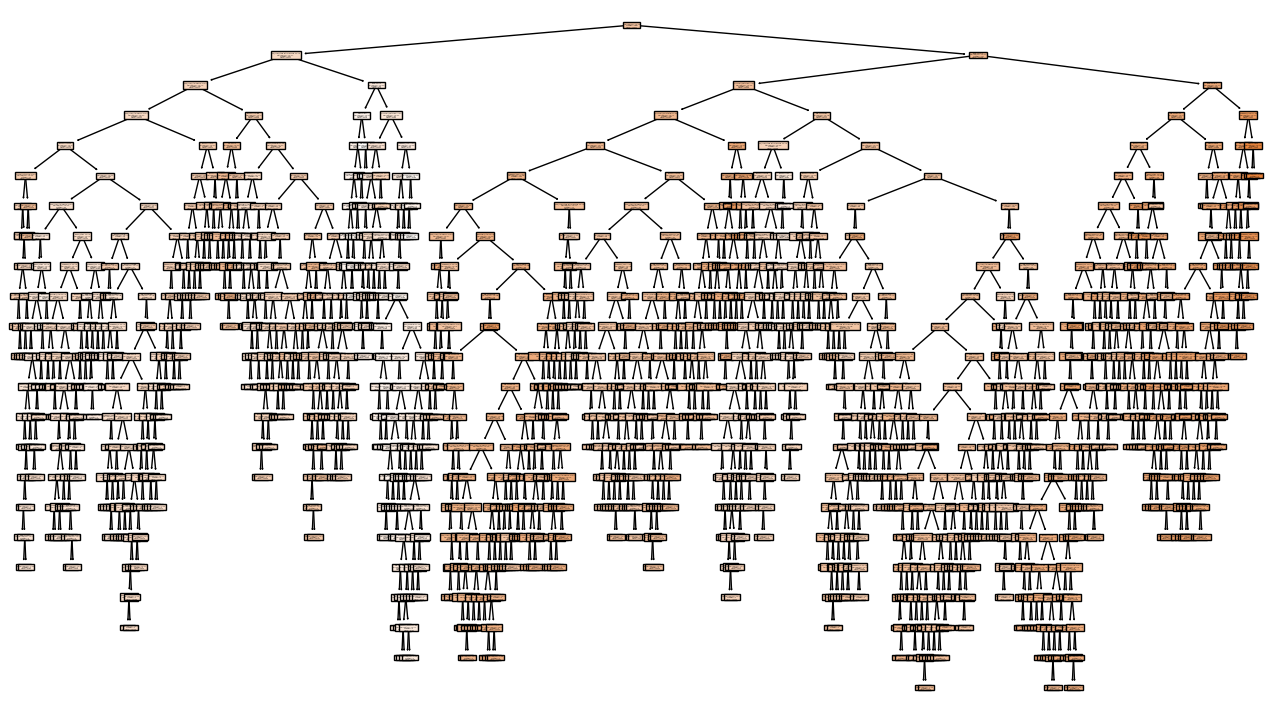

In [90]:
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=train.columns)

In [91]:
path = reg.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas

In [92]:
alphalist = []
for alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=0,ccp_alpha=alpha)
    reg.fit(X_train,y_train)
    alphalist.append(reg)

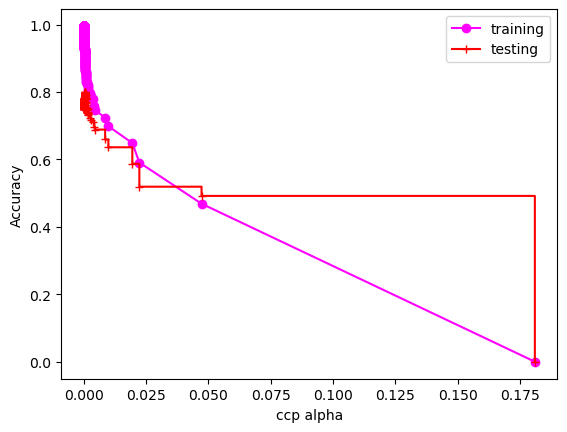

In [93]:
train_score = [reg.score(X_train,y_train) for reg in alphalist]
test_score = [reg.score(X_test,y_test) for reg in alphalist]

plt.xlabel('ccp alpha')
plt.ylabel('Accuracy')

plt.plot(ccp_alphas,train_score,marker = 'o',
        label = 'training',color = 'magenta')
plt.plot(ccp_alphas,test_score,marker = '+',
         label = 'testing',color = 'red',drawstyle = 'steps-post')
plt.legend()
plt.show()

*possible values of alpha can lie between `[0.0025-->0.0075]`*

[Text(0.5555555555555556, 0.9, 'Ram <= 7.0\nsquared_error = 0.386\nsamples = 1082\nvalue = 10.831'),
 Text(0.3333333333333333, 0.7, 'CPU_name_Other Intel Processor <= 0.5\nsquared_error = 0.187\nsamples = 351\nvalue = 10.217'),
 Text(0.2222222222222222, 0.5, 'CPU_name_Intel Core i5 <= 0.5\nsquared_error = 0.134\nsamples = 255\nvalue = 10.377'),
 Text(0.1111111111111111, 0.3, 'squared_error = 0.083\nsamples = 152\nvalue = 10.221'),
 Text(0.3333333333333333, 0.3, 'squared_error = 0.12\nsamples = 103\nvalue = 10.608'),
 Text(0.4444444444444444, 0.5, 'squared_error = 0.079\nsamples = 96\nvalue = 9.79'),
 Text(0.7777777777777778, 0.7, 'Ram <= 14.0\nsquared_error = 0.214\nsamples = 731\nvalue = 11.125'),
 Text(0.6666666666666666, 0.5, 'TypeName_Notebook <= 0.5\nsquared_error = 0.154\nsamples = 537\nvalue = 10.966'),
 Text(0.5555555555555556, 0.3, 'squared_error = 0.101\nsamples = 265\nvalue = 11.167'),
 Text(0.7777777777777778, 0.3, 'PPI <= 114.881\nsquared_error = 0.128\nsamples = 272\nvalu

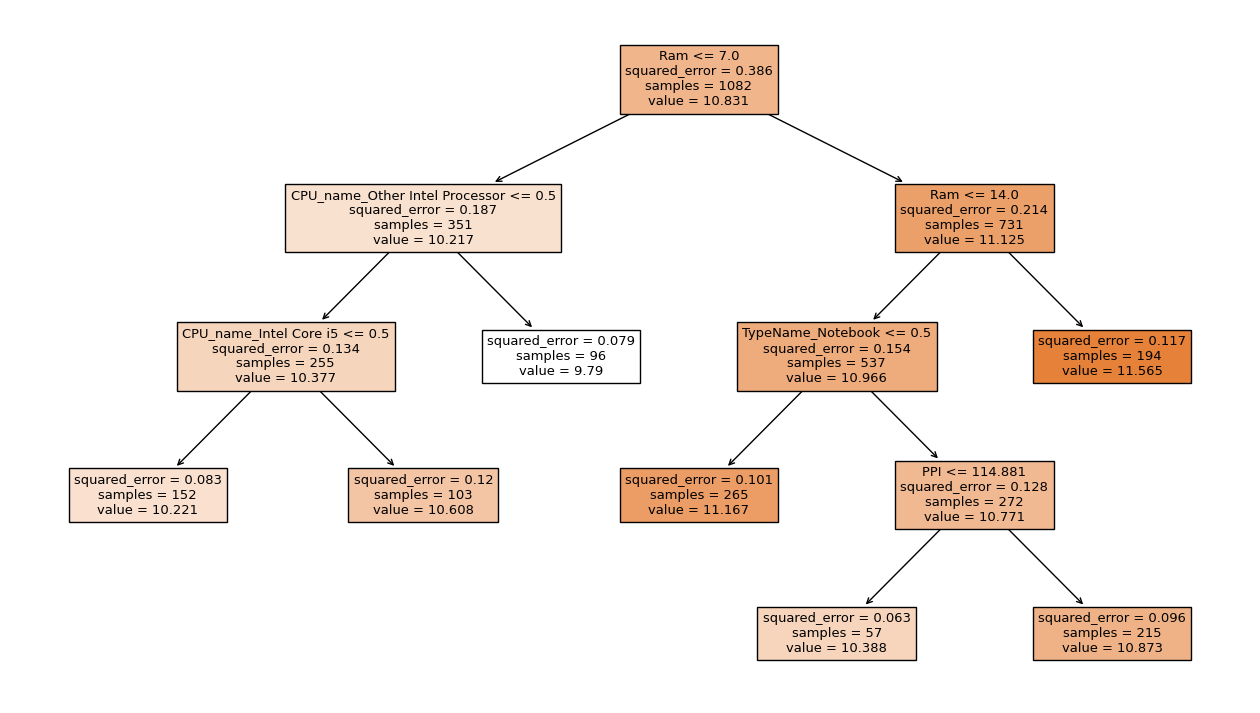

In [94]:
reg = DecisionTreeRegressor(random_state=0,ccp_alpha=0.0085)
reg.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=train.columns)

In [95]:
params=  {
    
    'RandomForest':{
        'model' : RandomForestRegressor(),
        'params':{
            'n_estimators':[int(x) for x in np.linspace(100,1200,10)],
            'criterion':["squared_error", "absolute_error"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    },
    'Decision Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion':["squared_error", "absolute_error"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    }
}

In [96]:
scores = []
for modelname,mp in params.items():
    clf = RandomizedSearchCV(mp['model'],
                            param_distributions=mp['params'],cv = 5,
                            n_iter=10,scoring='neg_mean_squared_error',verbose=2)
    clf.fit(X_train,y_train)
    scores.append({
        'model_name':modelname,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_,
    })

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=14, n_estimators=955; total time=   2.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=14, n_estimators=955; total time=   2.5s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=14, n_estimators=955; total time=   2.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=14, n_estimators=955; total time=   2.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=14, n_estimators=955; total time=   2.8s
[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=588; total time=   0.7s
[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=588; total time=   0.7s
[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=588; total time=   1.0s
[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=588; total time=   0.8s
[CV] END ccp_alpha=0.0025, criterion=squared_error, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=588; total time=   0.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=711; total time=   6.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=711; total time=   8.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=711; total time=   6.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=711; total time=   5.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=711; total time=   8.1s
[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=22, max_features=log2, min_samples_leaf=14, min_samples_split=10, n_estimators=711; total time=   1.0s
[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=22, max_features=log2, min_samples_leaf=14, min_samples_split=10, n_estimators=711; total time=   1.1s
[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=22, max_features=log2, min_samples_leaf=14, min_samples_split=10, n_estimators=711; total time=   1.0s
[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=22, max_features=log2, min_samples_leaf=14, min_samples_split=10, n_estimators=711; total time=   1.0s
[CV] END ccp_alpha=0.005, criterion=squared_error, max_depth=22, max_features=log2, min_samples_leaf=14, min_samples_split=10, n_estimators=711; total time=   1.0s
[CV] END ccp_alp

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=588; total time=  10.5s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=588; total time=  12.5s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=588; total time=  10.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=588; total time=  13.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.005, criterion=absolute_error, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=588; total time=  12.4s
[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=466; total time=   2.9s
[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=466; total time=   2.8s
[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=466; total time=   2.5s
[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=466; total time=   4.8s
[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=22, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=466; total time=   2.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=14, n_estimators=833; total time=  24.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=14, n_estimators=833; total time=  23.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=14, n_estimators=833; total time=  21.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=14, n_estimators=833; total time=  20.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0075, criterion=absolute_error, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=14, n_estimators=833; total time=  20.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ccp_alpha=0.0125, criterion=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=squared_error, max_depth=8, max_features=sqrt, min_samples_leaf=10, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth=1, max_features=log2, min_samples_leaf=14, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=absolute_error, max_depth

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\A

[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [97]:
scores_df = pd.DataFrame(scores,columns=['model_name','best_score','best_estimator'])
scores_df

,model_name,best_score,best_estimator
0,RandomForest,-0.079853,"(DecisionTreeRegressor(ccp_alpha=0.005, criter..."
1,Decision Tree,-0.112797,"DecisionTreeRegressor(ccp_alpha=0.0125, criter..."


In [98]:
scores

[{'model_name': 'RandomForest',
  'best_score': -0.07985317033081667,
  'best_estimator': RandomForestRegressor(ccp_alpha=0.005, criterion='absolute_error', max_depth=8,
                        max_features='auto', min_samples_leaf=10,
                        min_samples_split=5, n_estimators=588)},
 {'model_name': 'Decision Tree',
  'best_score': -0.11279724731693375,
  'best_estimator': DecisionTreeRegressor(ccp_alpha=0.0125, criterion='absolute_error',
                        max_depth=30, max_features='auto', min_samples_leaf=5,
                        min_samples_split=5)}]

In [100]:
rf = RandomForestRegressor(ccp_alpha=0.005, criterion='absolute_error', max_depth=8,
                        max_features='auto', min_samples_leaf=10,
                        min_samples_split=5, n_estimators=588)

rf.fit(X_train,y_train)
ypred = rf.predict(X_test)
print(metrics.r2_score(y_test,y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


0.8554034002634634


## Prediction on the whole Dataset

In [102]:
testtrain = np.array(train)

predicted = rf.predict(testtrain)

predicted

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([11.2596328 , 11.2315871 , 10.88269168, ..., 11.58571457,
        9.76712989, 10.29310246])

In [103]:
# as we transformed our price variable to np.log
# we have to retranform it from np.log-->np.exp inorder to get the result

df['Predicted Price'] = np.array([np.exp(predicted[i]) for i in range(len(predicted))])

df

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Predicted Price
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,False,True,226.983005,Intel Core i5,0,128,Intel,77624.067079
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,False,False,127.677940,Intel Core i5,0,0,Intel,75477.290657
2,HP,Notebook,8,Other,1.86,30636.0000,False,False,141.211998,Intel Core i5,0,256,Intel,53246.730359
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,False,True,220.534624,Intel Core i7,0,512,AMD,107550.369989
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,False,True,226.983005,Intel Core i5,0,256,Intel,78397.600100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,Windows,2.20,38378.6496,False,False,100.454670,Intel Core i7,500,0,Nvidia,29528.242513
1270,Lenovo,2 in 1 Convertible,4,Windows,1.80,33992.6400,True,True,157.350512,Intel Core i7,0,128,Intel,34650.050787
1271,Lenovo,2 in 1 Convertible,16,Windows,1.30,79866.7200,True,True,276.053530,Intel Core i7,0,512,Intel,107550.369989
1272,Lenovo,Notebook,2,Windows,1.50,12201.1200,False,False,111.935204,Other Intel Processor,0,0,Intel,17450.610137


C:\Users\anike\AppData\Local\Temp\ipykernel_25988\1353923403.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'],hist=False,color='orange',label='Actual')
C:\Users\anike\AppData\Local\Temp\ipykernel_25988\1353923403.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

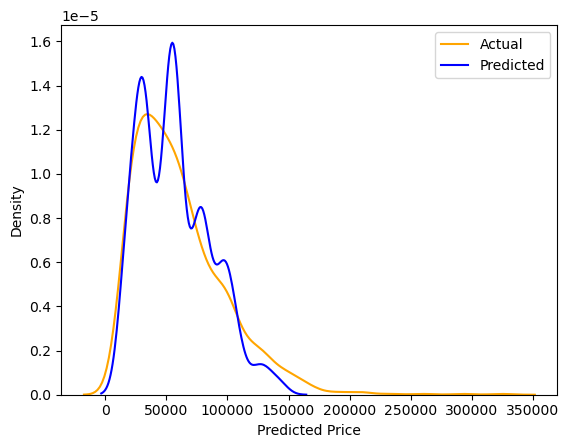

In [104]:
sns.distplot(df['Price'],hist=False,color='orange',label='Actual')
sns.distplot(df['Predicted Price'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

# Random Forest Regressor version_2

In [105]:
rf1 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

rf1.fit(X_train,y_train)
print(f'R2 score : {metrics.r2_score(y_test,rf1.predict(X_test))}')

R2 score : 0.8506261097238673


In [106]:
predicted = rf1.predict(testtrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [107]:
# as we transformed our price variable to np.log
# we have to retranform it from np.log-->np.exp inorder to get the result

data = df.copy()
data['Predicted Price'] = np.array([np.exp(predicted[i]) for i in range(len(predicted))])
data

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Predicted Price
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,False,True,226.983005,Intel Core i5,0,128,Intel,72877.097381
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,False,False,127.677940,Intel Core i5,0,0,Intel,53792.089132
2,HP,Notebook,8,Other,1.86,30636.0000,False,False,141.211998,Intel Core i5,0,256,Intel,40372.404754
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,False,True,220.534624,Intel Core i7,0,512,AMD,131798.065204
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,False,True,226.983005,Intel Core i5,0,256,Intel,80827.066809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,Windows,2.20,38378.6496,False,False,100.454670,Intel Core i7,500,0,Nvidia,36145.790448
1270,Lenovo,2 in 1 Convertible,4,Windows,1.80,33992.6400,True,True,157.350512,Intel Core i7,0,128,Intel,38182.810151
1271,Lenovo,2 in 1 Convertible,16,Windows,1.30,79866.7200,True,True,276.053530,Intel Core i7,0,512,Intel,95808.229659
1272,Lenovo,Notebook,2,Windows,1.50,12201.1200,False,False,111.935204,Other Intel Processor,0,0,Intel,14850.122653


C:\Users\anike\AppData\Local\Temp\ipykernel_25988\2629084388.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'],hist=False,color='orange',label='Actual')
C:\Users\anike\AppData\Local\Temp\ipykernel_25988\2629084388.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

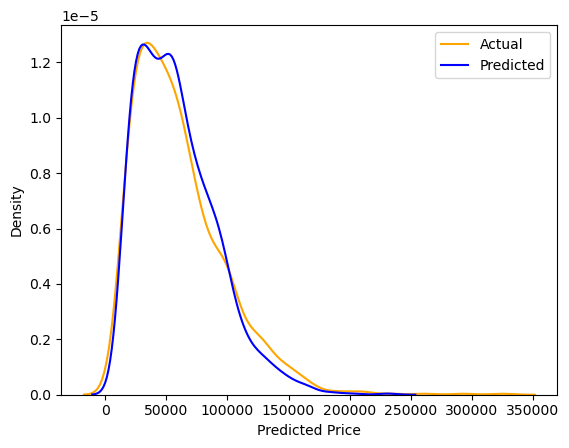

In [108]:
sns.distplot(data['Price'],hist=False,color='orange',label='Actual')
sns.distplot(data['Predicted Price'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

In [109]:
import pickle
file = open('./model/laptop_price_predictor.pkl','wb')
pickle.dump(rf1,file)
file.close()

In [110]:
X_train.iloc[0]

Ram                                        8
Weight                                   1.9
TouchScreen                            False
IPS                                    False
PPI                               141.211998
HDD                                        0
SSD                                      256
Company_Apple                              0
Company_Asus                               0
Company_Chuwi                              0
Company_Dell                               1
Company_Fujitsu                            0
Company_Google                             0
Company_HP                                 0
Company_Huawei                             0
Company_LG                                 0
Company_Lenovo                             0
Company_MSI                                0
Company_Mediacom                           0
Company_Microsoft                          0
Company_Razer                              0
Company_Samsung                            0
Company_To